# Predicting Student Performance Using Multivariate Analysis

MEMBER 1: PRAFULL PATIL – 1132220923

MEMBER 2: DARSHAN DHAWADE – 1132220834


In [1]:
# Importing Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport

In [2]:
%matplotlib inline

In [3]:
# Importing Dataset
data = pd.read_csv(r"C:\\Users\\admin\\Desktop\\Student Score Prediction\\StudentPerformanceFactors.csv")
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
data.shape

# Preprocessing Steps  
The following steps were applied to clean and prepare the dataset:  
1. Handling missing values  
2. Encoding categorical features  
3. Scaling numerical features  
4. Removing outliers  

# Data Preprocessing and Cleaning

In [6]:
# Checking for null values
data.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
# Fill NaN values with mode of each column
for col in data.columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Again Checking for null values
data.isna().sum()

C:\Users\admin\AppData\Local\Temp\ipykernel_13776\3693704779.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_13776\3693704779.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

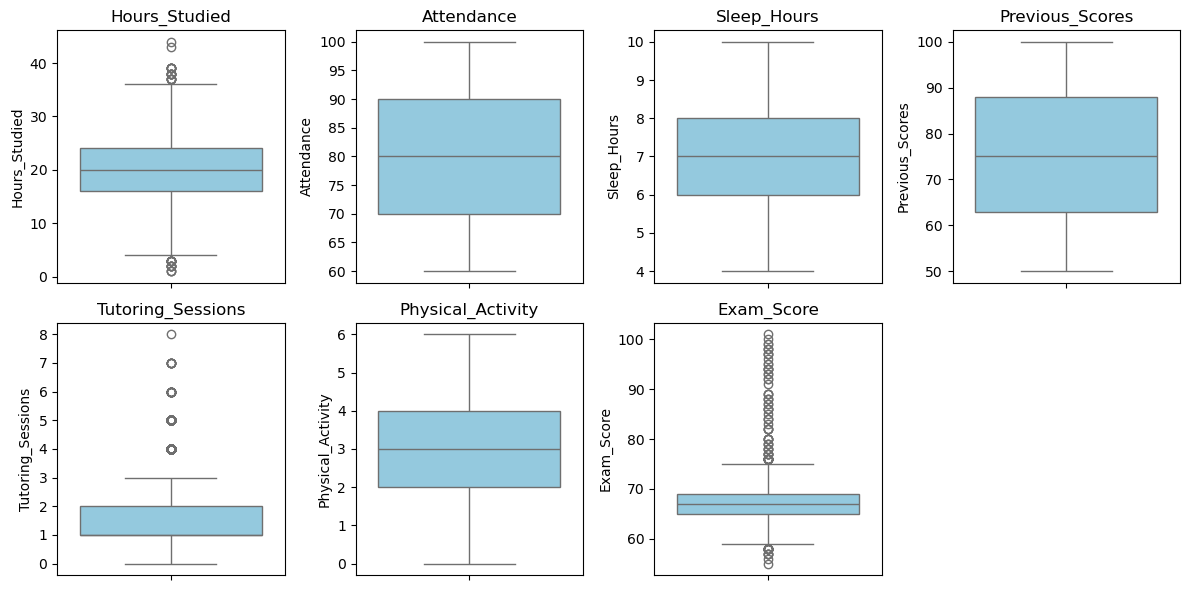

In [8]:
# Outlier Detection
# Select only numerical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, (len(num_cols)+1)//2, i)  # auto-arrange in grid
    sns.boxplot(y=data[col], color="skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()

In [9]:
# Label Encoding for all categorical columns
from sklearn.preprocessing import LabelEncoder

# Make a copy of the data
df = data.copy()

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to all object (categorical) columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Check transformed data
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


In [10]:
# Dividing the data into dependent and independent variables
x = df.iloc[:, :-1]
x.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0


In [11]:
y = df.iloc[:, -1]
y.head()

0    67
1    61
2    74
3    71
4    70
Name: Exam_Score, dtype: int64

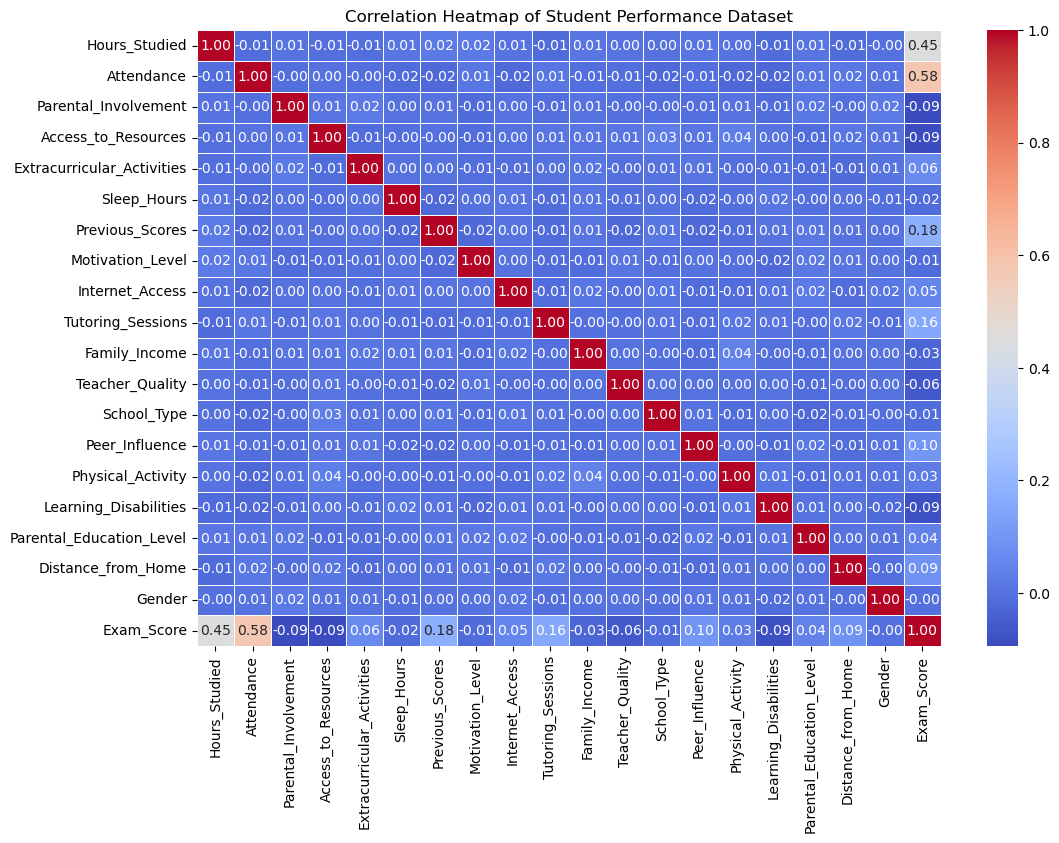

In [12]:
# Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Student Performance Dataset")
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)  

# Training the Model

In [26]:
# Splitting Data into train and test splits
from sklearn.model_selection import train_test_split

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5285, 19)
X_test shape: (1322, 19)
y_train shape: (5285,)
y_test shape: (1322,)


In [43]:
# Model Selection and training
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# Initialize model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_scaled, y)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
# Prediction
y_pred = model.predict(X_scaled)
y_pred

array([67.97, 61.27, 73.88, ..., 68.12, 67.87, 63.86])

In [49]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Evaluation metrics
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("📊 Model Evaluation Results")
print("R² Score        :", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE) :", mse)
print("Root Mean Squared Error (RMSE):", rmse)


📊 Model Evaluation Results
R² Score        : 0.9466554997544369
Mean Absolute Error (MAE): 0.4392583623429696
Mean Squared Error (MSE) : 0.8072812774330255
Root Mean Squared Error (RMSE): 0.8984883290466412


### Result Explaination

- R² = 0.947 → The model explains about 95% of the variation in student scores (excellent fit).

- MAE = 0.44 → On average, predictions are off by less than 0.5 marks.

- RMSE = 0.90 → Typical prediction error is under 1 mark, in the same units as scores.

- MSE = 0.81 → Squared error (used mainly for calculation of RMSE).